# Importando as coisas importantes e definindo cores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True
import re

img_path = r'../../../itc/'

In [2]:

#Cores = {'Água':'#ff0000', 'Glicerina':'#ff8000', 'Sacarose':'#00b300', 
#         'Ureia':'#00bfff', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 8
dict_nomes = {'13BD':'1,3BD',
             'Agua':'Água',
             'DMSO':'DMSO',
             'Glic':'Glicerina',
             'Sac':'Sacarose',
             'Ureia':'Ureia'}
simbolos_mpl = ['o', '<', '>', '^', 'v', 'd', '*', 'p', '+', 'h', 'D', 'D']
simbolos_conc = {conc:simb for conc, simb in zip(np.arange(5, 65, 5), simbolos_mpl)}
simbolos_conc[100] = 's'
simbolos_conc

{5: 'o',
 10: '<',
 15: '>',
 20: '^',
 25: 'v',
 30: 'd',
 35: '*',
 40: 'p',
 45: '+',
 50: 'h',
 55: 'D',
 60: 'D',
 100: 's'}

In [3]:
def qual_cor(concentracao):
    if type(concentracao) == str:
        concentracao = int(concentracao)
    if concentracao == 0 or concentracao == 100:
        return '#ff0000'
    elif concentracao == 5:
        return '#ff8000'
    elif concentracao == 10:
        return '#00b300'
    elif concentracao == 15:
        return '#00bfff'
    elif concentracao == 20:
        return '#0000ff'
    elif concentracao == 25:
        return '#bf00ff'
    elif concentracao == 30:
        return '#00aba9'
    elif concentracao == 35:
        return 'C7'
    elif concentracao == 40:
        return
    elif concentracao == 50:
        return
    elif concentracao == 60:
        return

# Abrindo o arquivo com os dados e organizando-o

In [4]:
dados = pd.read_csv('titulacoes.csv', delimiter=';', decimal=',')
dados.drop(['13BD 15p.csv Xt (mM)', '13BD 15p.csv ∆H (J/mol)'], axis=1, inplace=True)

Xts_nomes = dados.columns[::2]
DHs_nomes = dados.columns[1::2]

Xts_nomes = Xts_nomes.tolist()
DHs_nomes = DHs_nomes.tolist()

def find_conc(string):
    re_conc = re.compile(r'(\d?\d)p')
    conc = re_conc.search(string)
    if conc:
        conc = conc.group(1).zfill(2)
    else:
        conc = '100'
    return conc

def sort_comps(string):
    conc = find_conc(string)
    comp = string.split(' ')[0]
    return f'{comp}{conc}'

Xts_nomes.sort(key = sort_comps)
DHs_nomes.sort(key = sort_comps)

Xts = dados[Xts_nomes]
DHs = dados[DHs_nomes]


# Plotando as curvas

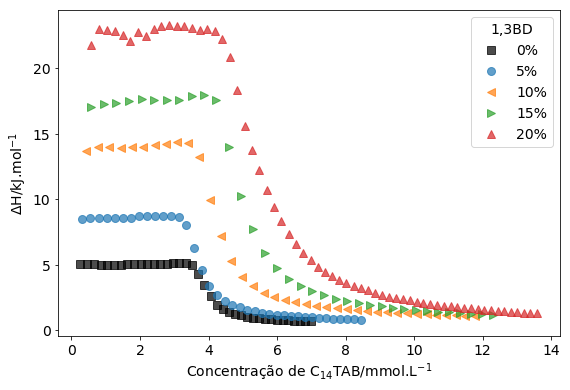

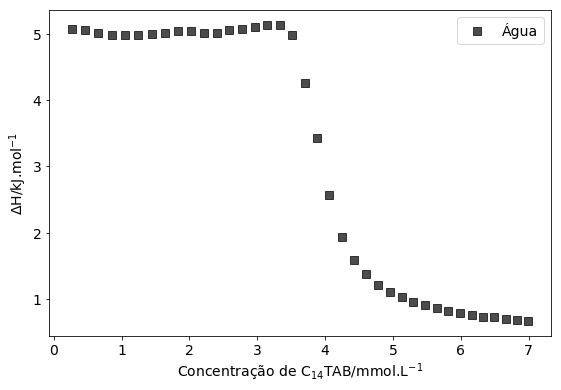

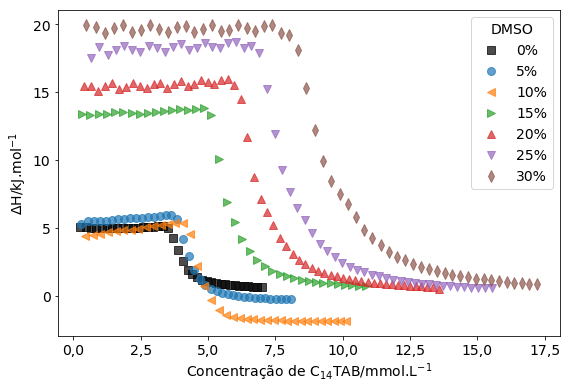

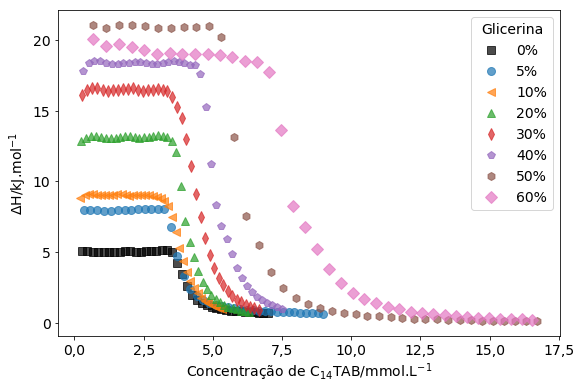

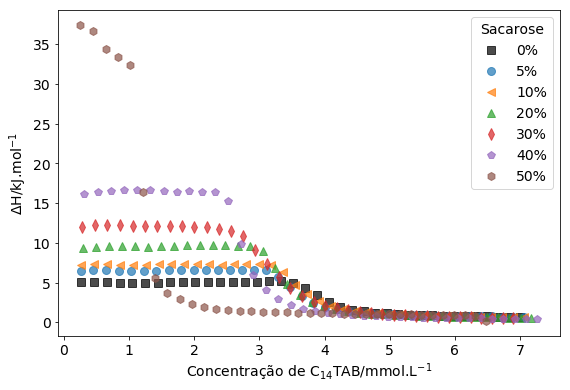

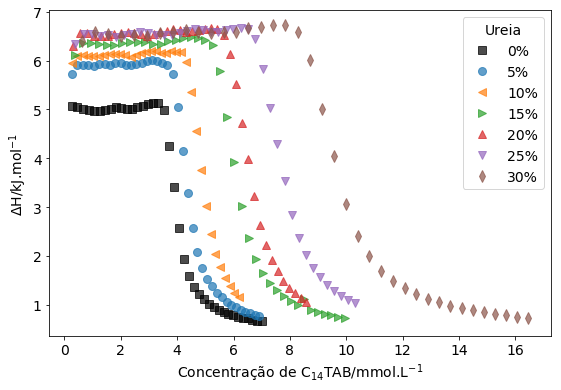

In [6]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig_13, ax_13 = plt.subplots(1, 1, figsize=(9,6))
fig_agua, ax_agua = plt.subplots(1, 1, figsize=(9,6))
fig_dmso, ax_dmso  = plt.subplots(1, 1, figsize=(9,6))
fig_glic, ax_glic  = plt.subplots(1, 1, figsize=(9,6))
fig_sac, ax_sac = plt.subplots(1, 1, figsize=(9,6))
fig_ur, ax_ur  = plt.subplots(1, 1, figsize=(9,6))

dict_axes = {'13BD':ax_13, 'Agua':ax_agua, 'DMSO':ax_dmso, 'Glic':ax_glic, 'Sac':ax_sac, 'Ureia':ax_ur}

for ax in dict_axes.values():
    ax.plot(Xts['Agua 2018.csv Xt (mM)'][1:], DHs['Agua 2018.csv ∆H (J/mol)'][1:]/1000, label='0%',
           markersize=def_markersize, linewidth=0, marker='s', color='k', alpha=0.7)
ax_agua.set(xlabel='Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='$\Delta$H/kJ.mol$^{-1}$')
ax_agua.get_lines()[0].set_label('Água')
ax_agua.legend()
#ax_agua.set_title('Água', loc='right', fontsize='medium')
    
for Xt, DH in zip(Xts, DHs):
    comp = Xt.split(' ')[0]
    conc = int(find_conc(Xt))
    if 'Agua' in Xt:
        continue
    dict_axes[comp].plot(Xts[Xt][1:], DHs[DH][1:]/1000, label=f'{conc}%', 
                         markersize=def_markersize, linewidth=0, marker=simbolos_conc[conc], alpha=0.7)
    
    dict_axes[comp].set(xlabel='Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='$\Delta$H/kJ.mol$^{-1}$')
    #dict_axes[comp].set_title(dict_nomes[comp], loc='right', fontsize='medium')
    dict_axes[comp].legend(title=dict_nomes[comp])
    
figs = [fig_13, fig_agua, fig_dmso, fig_glic, fig_sac, fig_ur]
nomes = ['ITC_13BD.pdf', 'ITC_agua.pdf', 'ITC_dmso.pdf', 'ITC_glic.pdf', 'ITC_sac.pdf', 'ITC_ur.pdf']
for fig, nome in zip(figs, nomes):
    fig.savefig(img_path + nome)